In [20]:
import pandas as pd
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from pathlib import Path
import matplotlib.pyplot as plt


In [21]:
DATA_PATH = Path(r'C:\Users\SIEGLEW\OneDrive - Daimler Truck\MA\Quellen\Datasets\Measurement Data')
File = Path(DATA_PATH, "TripB10.csv")

In [22]:
data_table = pd.read_csv(File, encoding='ISO-8859-1')
# Get the column names
column_names = data_table.columns[0].split(';')
print(column_names)


['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Ambient Temperature Sensor [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]', 'Temperature Defrost centr

In [23]:
# Split the single column into multiple columns using the semicolon delimiter
data_table = data_table.iloc[:, 0].str.split(';', expand=True)

# Use the provided column names
data_table.columns = column_names

# Reset the index
data_table.reset_index(drop=True, inplace=True)

# Replace NaN
data_table = data_table.apply(lambda x: np.interp(np.arange(len(x)), np.arange(len(x))[~x.isna()], x.dropna()) if x.isna().any() else x)


In [24]:

# Replace NaN
# Replace NaN and convert all columns to numeric
data_table = data_table.apply(lambda x: np.interp(np.arange(len(x)), np.arange(len(x))[~x.isna()], x.dropna()) if x.isna().any() else x)
data_table = data_table.apply(pd.to_numeric, errors='coerce')
data_table.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,505.0,0.0,0.0,-0.21,0.0,391.5,-1.40,2.0,...,0.66,0.66,-1.0,-1.08,9.56,9.13,5.98,3.10,4.24,5.37
1,0.1,0.0,505.0,0.0,0.0,-0.21,0.0,391.5,-1.40,2.0,...,0.66,0.66,-1.0,-1.08,9.56,9.13,5.98,3.10,4.24,5.37
2,0.2,0.0,505.0,0.0,0.0,-0.21,0.0,391.5,-1.43,2.0,...,0.66,0.66,-1.0,-1.08,9.56,9.13,5.98,3.11,4.24,5.37
3,0.3,0.0,505.0,0.0,0.0,-0.21,0.0,391.5,-1.48,2.0,...,0.66,0.66,-1.0,-1.08,9.56,9.13,5.98,3.12,4.24,5.37
4,0.4,0.0,505.0,0.0,0.0,-0.21,0.0,391.5,-1.44,2.0,...,0.66,0.66,-1.0,-1.08,9.56,9.13,5.98,3.13,4.24,5.37


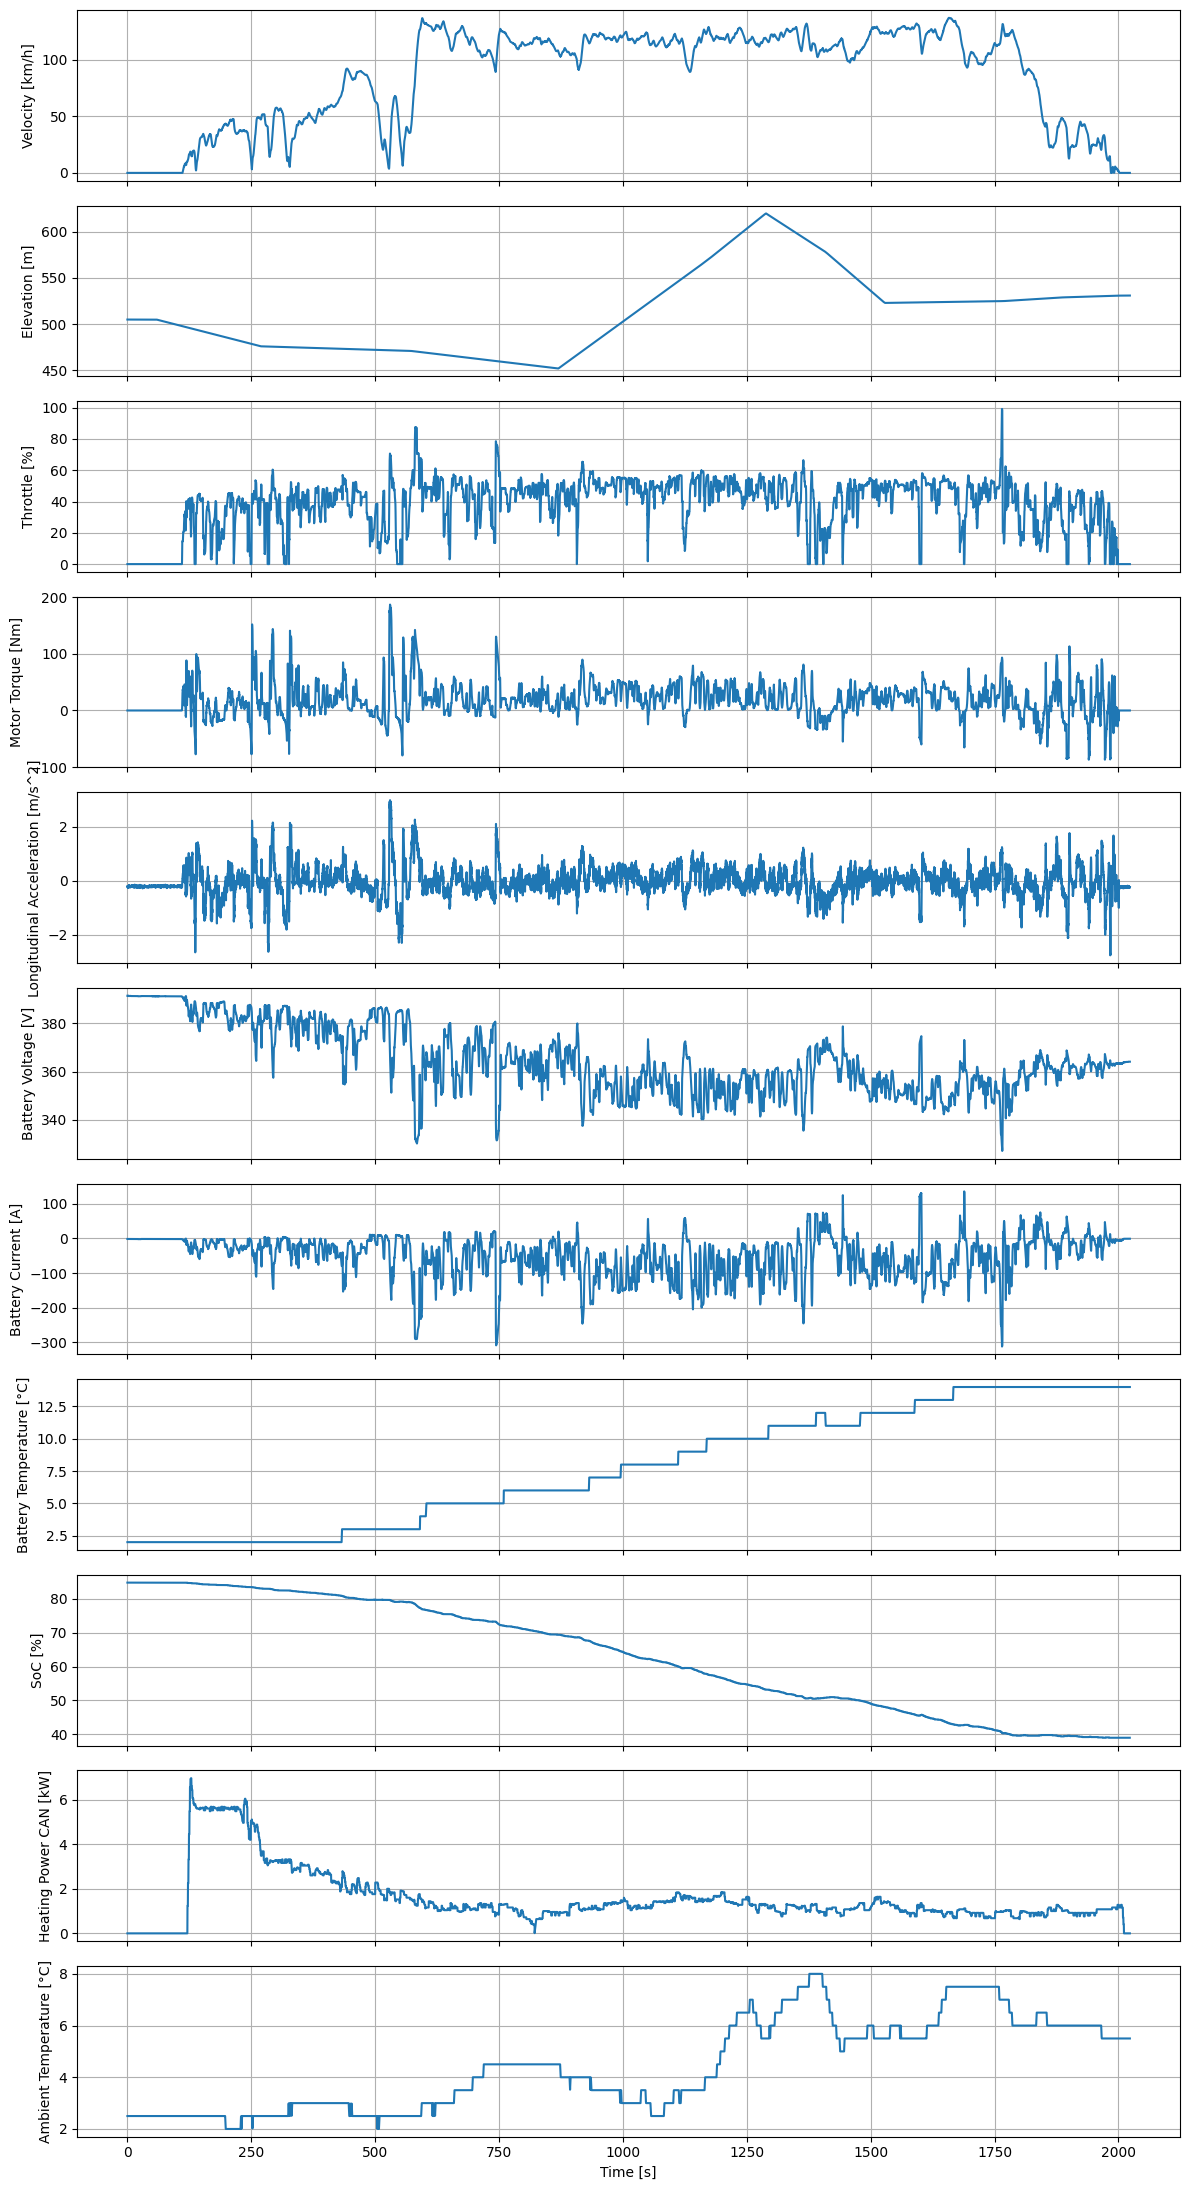

In [26]:
# Specify the columns to plot
columns_to_plot = [
    'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 
    'Longitudinal Acceleration [m/s^2]', 'Battery Voltage [V]', 
    'Battery Current [A]', 'Battery Temperature [°C]', 'SoC [%]', 'Heating Power CAN [kW]', 'Ambient Temperature [°C]'
]

# Plot each specified column above each other with a shared time x-axis
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, 2 * num_columns), sharex=True)

for i, column in enumerate(columns_to_plot):
    axes[i].plot(data_table['Time [s]'], data_table[column])
    axes[i].set_ylabel(column)
    axes[i].grid(True)

axes[-1].set_xlabel('Time [s]')
plt.tight_layout()
plt.show()